__Kaggle Competition__: House Prices Prediction using Linear Regeression

# Libraries needed

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.preprocessing import RobustScaler
from sklearn.metrics import mean_squared_error
import statsmodels.formula.api as sm

# Load Data

In [2]:
train=pd.read_csv('train.csv')
test=pd.read_csv('test.csv')

n_train=train.shape[0]
y=train['SalePrice']
train=train.drop(['SalePrice'],axis=1)

data = pd.concat([train,test],ignore_index=True,sort=False)

In [3]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 80 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

# Missing Data

In [5]:
nans=pd.isnull(data).sum()/data.shape[0]
print(nans[nans>0].sort_values(ascending=False)*100)

PoolQC          99.657417
MiscFeature     96.402878
Alley           93.216855
Fence           80.438506
FireplaceQu     48.646797
LotFrontage     16.649538
GarageFinish     5.447071
GarageYrBlt      5.447071
GarageQual       5.447071
GarageCond       5.447071
GarageType       5.378554
BsmtExposure     2.809181
BsmtCond         2.809181
BsmtQual         2.774923
BsmtFinType2     2.740665
BsmtFinType1     2.706406
MasVnrType       0.822199
MasVnrArea       0.787941
MSZoning         0.137033
BsmtFullBath     0.068517
BsmtHalfBath     0.068517
Utilities        0.068517
Functional       0.068517
Exterior2nd      0.034258
Exterior1st      0.034258
SaleType         0.034258
BsmtFinSF1       0.034258
BsmtFinSF2       0.034258
BsmtUnfSF        0.034258
Electrical       0.034258
KitchenQual      0.034258
GarageCars       0.034258
GarageArea       0.034258
TotalBsmtSF      0.034258
dtype: float64


In [6]:
data = data.drop(['Id','PoolQC','MiscFeature','Alley','Fence','FireplaceQu'],axis=1)

In [7]:
data['LotFrontage'] = data[['LotFrontage','Neighborhood']].groupby('Neighborhood')['LotFrontage'].transform(
    lambda x: x.fillna(x.median()))

In [8]:
data['MSZoning'] = data[['MSZoning','MSSubClass']].groupby('MSSubClass')['MSZoning'].transform(lambda x: x.fillna(x.mode()))

In [9]:
data.loc[:,['GarageQual','GarageCond','GarageFinish','GarageType']] = data.loc[:,['GarageQual','GarageCond','GarageFinish','GarageType']].fillna('None')
data['GarageYrBlt'] = data['GarageYrBlt'].fillna(0)
data = data.fillna(data.median())

# Data Visualisation

Skewness of SalePrice: 1.882876


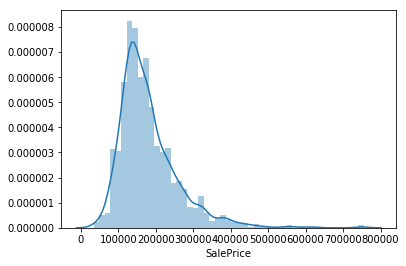

In [10]:
print("Skewness of SalePrice: %f" %y.skew())
sns.distplot(y)

(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5, 12.5, 13.5, 14.5, 15.5, 16.5, 17.5, 18.5, 19.5, 20.5, 21.5,
        22.5, 23.5, 24.5, 25.5, 26.5, 27.5, 28.5, 29.5, 30.5, 31.5, 32.5,
        33.5, 34.5, 35.5, 36.5]), <a list of 37 Text yticklabel objects>)

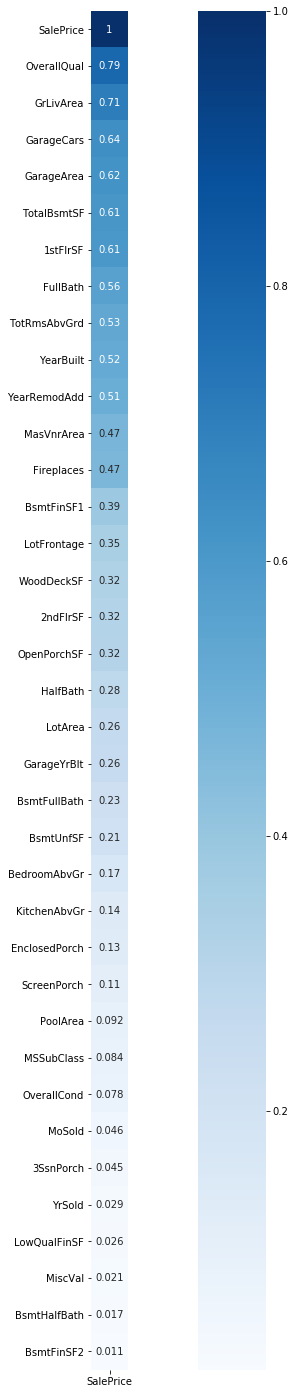

In [11]:
c_salePrice = pd.concat([data,y],axis=1).corr()['SalePrice']
c_salePrice = abs(c_salePrice).sort_values(ascending = False)

fig,ax=plt.subplots(figsize=(25,25))
sns.heatmap(pd.DataFrame(c_salePrice),annot=True,square=True,ax=ax,cmap='Blues')
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

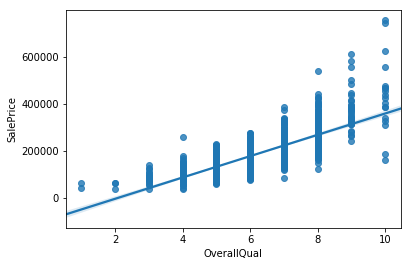

In [12]:
sns.regplot(train['OverallQual'],y)

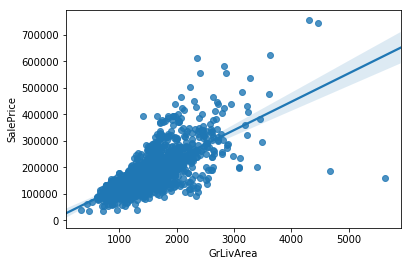

In [13]:
sns.regplot(train['GrLivArea'],y)

# Features engineering

In [14]:
print(data['Utilities'].value_counts())

AllPub    2916
NoSeWa       1
Name: Utilities, dtype: int64


In [15]:
print(data['Street'].value_counts())

Pave    2907
Grvl      12
Name: Street, dtype: int64


In [16]:
print(data['Condition1'].value_counts())

Norm      2511
Feedr      164
Artery      92
RRAn        50
PosN        39
RRAe        28
PosA        20
RRNn         9
RRNe         6
Name: Condition1, dtype: int64


In [17]:
print(data['Condition2'].value_counts())

Norm      2889
Feedr       13
Artery       5
PosN         4
PosA         4
RRNn         2
RRAn         1
RRAe         1
Name: Condition2, dtype: int64


In [18]:
print(data['BldgType'].value_counts())

1Fam      2425
TwnhsE     227
Duplex     109
Twnhs       96
2fmCon      62
Name: BldgType, dtype: int64


These features don't give us more informations in our data because most of its values are equal to one value, so we will drop them.

In [19]:
data = data.drop(['Utilities','Street','Condition1',
                  'Condition2','BldgType'],axis=1)

# Data Transformation

* Dummies transformation

In [20]:
def create_dummy(data,feature):
    dummy = pd.get_dummies(data[feature])
    dummy.columns=[feature+s for s in dummy.columns]
    data = pd.concat([data,dummy],axis=1)
    data=data.drop(feature,axis=1)
    return data

In [21]:
categorical=[f for f in data.columns if data.dtypes[f] =='object']
numeric=[f for f in data.columns if data.dtypes[f]!='object']

data[numeric]=data[numeric].astype('float64')

In [22]:
for f in categorical:
    data=create_dummy(data,f)

* log(1+x) transformation


_Linear Regression assumes normality of errors_
This transformation helps the reduction of the impact on residuals of large values in the response.

NB: we add 1 for zeros values

In [23]:
y=np.log1p(y)

data[numeric]=np.log1p(data[numeric])

* Scaling

In [24]:
scaler=RobustScaler()
data[numeric]=scaler.fit_transform(data[numeric])

# Features selection

We'll use **Forward selection** algorithm to select best features that minimize the mean squarred error and which have p-value less than 0.05

p-value indicates the level of significance of null hypothisis in our model.

In [25]:
train = data.iloc[:n_train,:]
test = data.iloc[n_train:,:]
test = test.reset_index()

def forward_selection(X,y):
    
    final_features=[]
    
    not_reduced_features=list(X.columns)
    MSE_hist=100000000000
    
    
    while (len(not_reduced_features)>0):
        MSE={}
        pvalue={}
        print('---------%d features ----------' %len(final_features))
        for f in not_reduced_features:
            features=final_features.copy()
            features.append(f)
            
            intercept=pd.DataFrame(np.ones((train.shape[0],1),dtype='float64'))
            intercept.columns=['Intercept']
            
            X_intercept = pd.concat([X[features],intercept],axis=1)
            
            reg = sm.OLS(y,X_intercept).fit()
            
            y_predict=reg.predict(X_intercept)
            r2=mean_squared_error(y,y_predict)
            
            MSE[f]=r2
            pvalue[f]=reg.pvalues[f]
                        
        mini,mini_f=min(zip(MSE.values(),MSE.keys()))
        if (mini<MSE_hist and pvalue[mini_f]<0.05):
            print('{} ---> MSE = {} ---- pvalue = {}\n'.format(mini_f,mini,pvalue[mini_f]))
            MSE_hist=mini
            final_features.append(mini_f)
            not_reduced_features.remove(mini_f)
        else:
            return final_features
    
    return final_features
            
            
features_selected = forward_selection(train,y)

---------0 features ----------
OverallQual ---> MSE = 0.056874043036502016 ---- pvalue = 0.0

---------1 features ----------
GrLivArea ---> MSE = 0.04185387613746576 ---- pvalue = 3.8721548365098445e-99

---------2 features ----------
YearBuilt ---> MSE = 0.03445459592279523 ---- pvalue = 1.5400558359000393e-63

---------3 features ----------
LotArea ---> MSE = 0.029442054063168858 ---- pvalue = 1.1595311143203101e-51

---------4 features ----------
OverallCond ---> MSE = 0.026681444900999555 ---- pvalue = 5.5732524861261325e-33

---------5 features ----------
BsmtFinSF1 ---> MSE = 0.024532716650947296 ---- pvalue = 2.3633255971493597e-28

---------6 features ----------
BsmtQualEx ---> MSE = 0.022817694732398183 ---- pvalue = 1.1084039563193398e-24

---------7 features ----------
RoofMatlClyTile ---> MSE = 0.02113232976666304 ---- pvalue = 5.0851971453993016e-26

---------8 features ----------
1stFlrSF ---> MSE = 0.020179530125170743 ---- pvalue = 2.8953162994040293e-16

---------9 fea

In [26]:
train = train[features_selected]
test = test[features_selected]

# Model

As a model we'll use Linear regression model.


We'll use statsmodel.formula.api.OLS

In [27]:
intercept=pd.DataFrame(np.ones((train.shape[0],1),dtype='float64'))
intercept.columns=['Intercept']

train_intercept = pd.concat([train,intercept],axis=1)

# Train our model
reg=sm.OLS(y,train_intercept).fit()

# Predict the results
intercept=pd.DataFrame(np.ones((test.shape[0],1),dtype='float64'))
intercept.columns=['Intercept']

test_intercept = pd.concat([test,intercept],axis=1)

res=reg.predict(test_intercept)

# we make exp(x)-1 transformation : the reverse of log(1+x)
res=np.exp(res)-1

print(res[:9])
print(reg.summary())

0    123341.656748
1    153466.532054
2    181524.508642
3    196566.929838
4    208970.448544
5    171676.139571
6    176691.401933
7    158140.733744
8    198572.320179
dtype: float64
                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.930
Model:                            OLS   Adj. R-squared:                  0.927
Method:                 Least Squares   F-statistic:                     343.5
Date:                Sat, 20 Apr 2019   Prob (F-statistic):               0.00
Time:                        22:24:10   Log-Likelihood:                 1205.6
No. Observations:                1460   AIC:                            -2301.
Df Residuals:                    1405   BIC:                            -2011.
Df Model:                          54                                         
Covariance Type:            nonrobust                                         
                        

In [28]:
print(reg.pvalues.sort_values())

Intercept                0.000000e+00
GrLivArea               4.483924e-142
RoofMatlClyTile          1.754386e-37
OverallCond              3.288783e-27
LotArea                  1.229994e-25
MSZoningC (all)          4.399170e-25
OverallQual              2.030985e-19
YearBuilt                4.082534e-18
GarageCars               1.304924e-17
NeighborhoodCrawfor      4.888458e-17
NeighborhoodNoRidge      2.519821e-13
NeighborhoodStoneBr      2.124144e-12
NeighborhoodNridgHt      3.640078e-11
SaleConditionAbnorml     2.510051e-10
NeighborhoodSomerst      6.502009e-10
FunctionalTyp            1.984882e-09
1stFlrSF                 2.260977e-09
KitchenQualEx            3.176070e-09
KitchenAbvGr             4.504484e-08
BsmtExposureGd           7.701639e-08
BsmtQualEx               9.124082e-08
Exterior1stBrkFace       2.204913e-07
MSZoningRM               1.731358e-06
NeighborhoodEdwards      3.462168e-06
YearRemodAdd             8.461613e-06
SaleTypeWD               1.619429e-05
HeatingQCEx 

## Conclusion

* After training our model we had a score: 0.929

* We deduce that Heating Type is the most significant feature in our model because it has the least p-value, followed by GrvLivArea, RoofMatlClyTile which is a type of roof, LotArea and OverallQual which is the most corrolated feature with SalePrice.


# Submission

In [29]:
indexes=pd.read_csv('test.csv').index+1461
submision=pd.DataFrame({'Id':indexes,'SalePrice':res})
submision.to_csv("submission.csv",index=False)